In [184]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [185]:
df = pd.read_csv('train.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [186]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


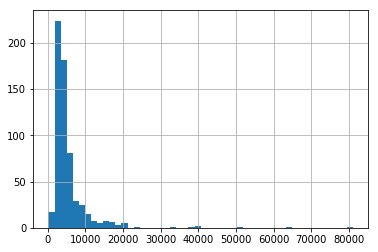

In [187]:
df['ApplicantIncome'].hist(bins=50)

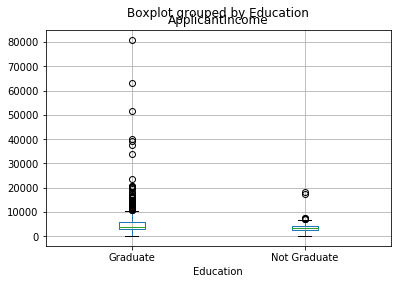

In [189]:
df.boxplot(column='ApplicantIncome', by='Education')

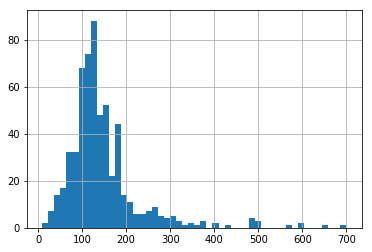

In [190]:
df['LoanAmount'].hist(bins=50)

In [192]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print(temp1)
print(temp2)

0.0     89
1.0    475
Name: Credit_History, dtype: int64
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


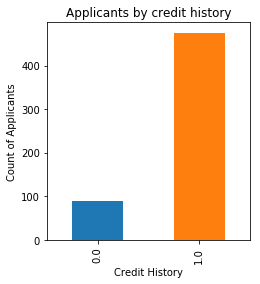

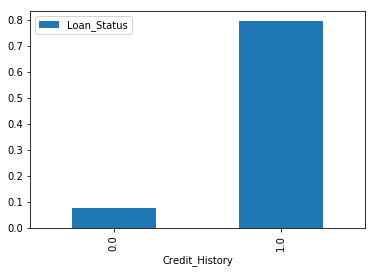

In [193]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp1.plot(kind='bar')
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by credit history')
temp2.plot(kind='bar')

In [195]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [196]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [197]:
df['Self_Employed'].fillna('No', inplace=True)

In [198]:
table = df.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)
print(table)
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)
#df

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


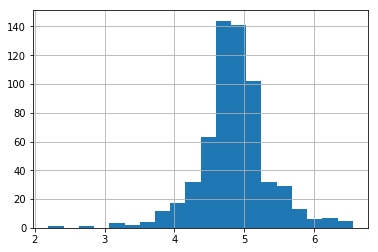

In [199]:
df['LoanAmount_Log'] = np.log(df['LoanAmount'])
df['LoanAmount_Log'].hist(bins=20)

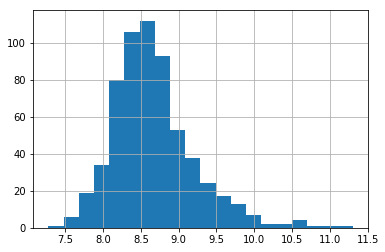

In [200]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_Log'] = np.log(df['TotalIncome'])
df['TotalIncome_Log'].hist(bins=20)

In [201]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [202]:
df['Gender'].fillna('Male', inplace=True)

In [203]:
df['Married'].fillna('Yes', inplace=True)

In [204]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [205]:
df['Dependents'].fillna(0,inplace=True)

In [206]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [207]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [208]:
df['Credit_History'].fillna(1.0,inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_Log       0
TotalIncome          0
TotalIncome_Log      0
dtype: int64

In [209]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_Log       float64
TotalIncome          float64
TotalIncome_Log      float64
dtype: object

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    
    predictions = model.predict(data[predictors])
    
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    model.fit(data[predictors],data[outcome]) 

In [211]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [212]:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [213]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [215]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_Log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 68.883%


In [217]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_Log','TotalIncome_Log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.361%


In [218]:
featimp = pd.Series(model.feature_importances_,index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History      0.265524
TotalIncome_Log     0.264729
LoanAmount_Log      0.227480
Dependents          0.052241
Loan_Amount_Term    0.047787
Property_Area       0.047310
Married             0.027166
Education           0.023256
Gender              0.023137
Self_Employed       0.021369
dtype: float64


In [219]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Credit_History', 'TotalIncome_Log', 'LoanAmount_Log', 'Dependents', 'Loan_Amount_Term']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.085%
Cross-Validation Score : 79.804%
